In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\netflix_movies (1).csv")
df.set_index('show_id', inplace=True)
df.head(20)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [4]:
#df.fillna("N/A", inplace=True)
#df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


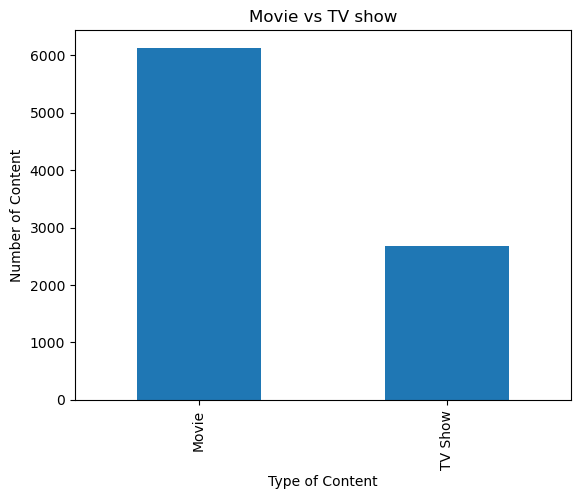

In [6]:
#What is the distribution of show types (Movies vs. TV Shows)?
type_counts = df["type"].value_counts()


type_counts.plot.bar()
plt.xlabel("Type of Content")
plt.ylabel("Number of Content")
plt.title("Movie vs TV show")
plt.show();

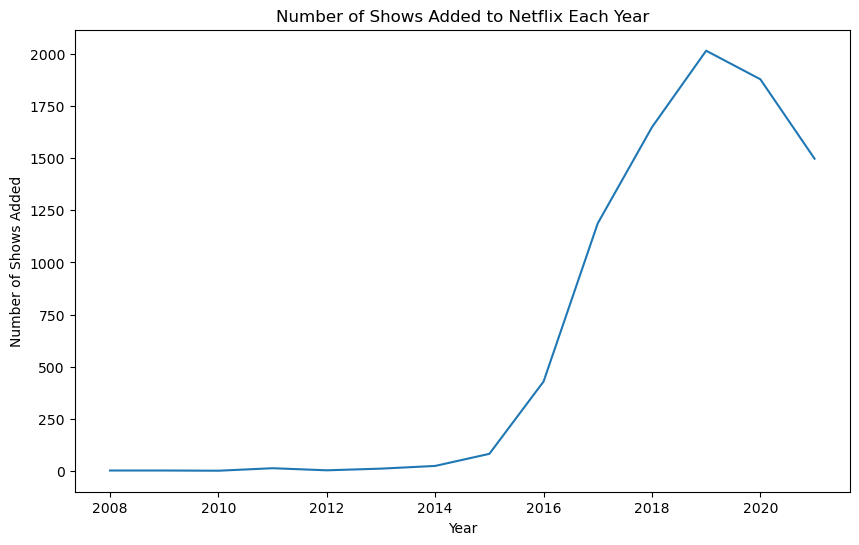

In [7]:
#How many shows were added to Netflix each year?

# Convert 'date_added' to datetime if it's not already
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Group by 'year_added' and count the shows added each year
shows_per_year = df['year_added'].value_counts().sort_index()

# Plot the results
shows_per_year.plot(kind='line', figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Number of Shows Added")
plt.title("Number of Shows Added to Netflix Each Year")
plt.show()

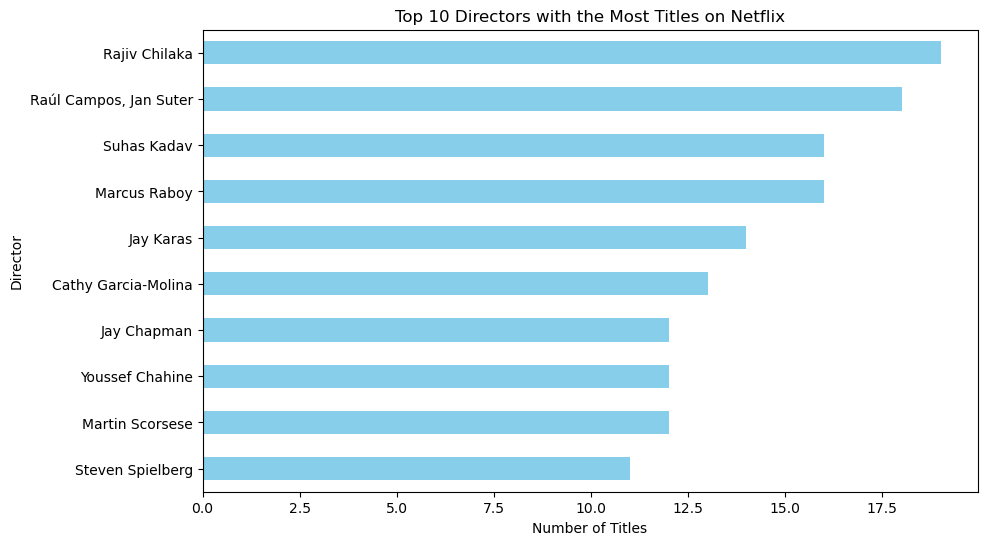

In [8]:
#What are the top 10 directors with the most titles on Netflix?

df_cleaned = df.dropna(subset=['director'])

top_directors = df['director'].value_counts().head(10).sort_values(ascending=True)


top_directors.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.title("Top 10 Directors with the Most Titles on Netflix")
plt.show();

<Figure size 1000x600 with 0 Axes>

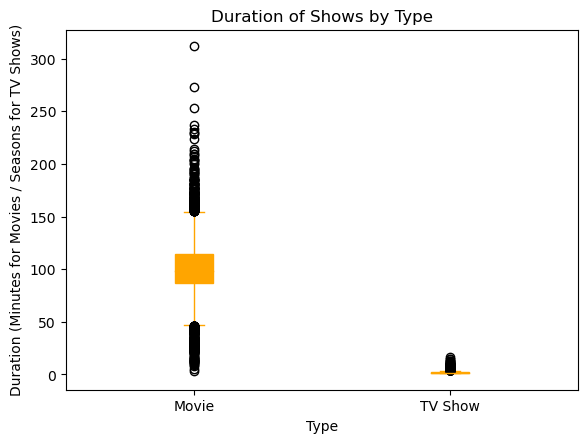

In [9]:
# What is the average duration of shows by type (Movies vs. TV Shows)?

df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
df.boxplot(column='duration_minutes', by='type', grid=False, patch_artist=True, color="orange")
plt.xlabel("Type")
plt.ylabel("Duration (Minutes for Movies / Seasons for TV Shows)")
plt.title("Duration of Shows by Type")
plt.suptitle("")  # Remove the default Pandas boxplot title
plt.show()

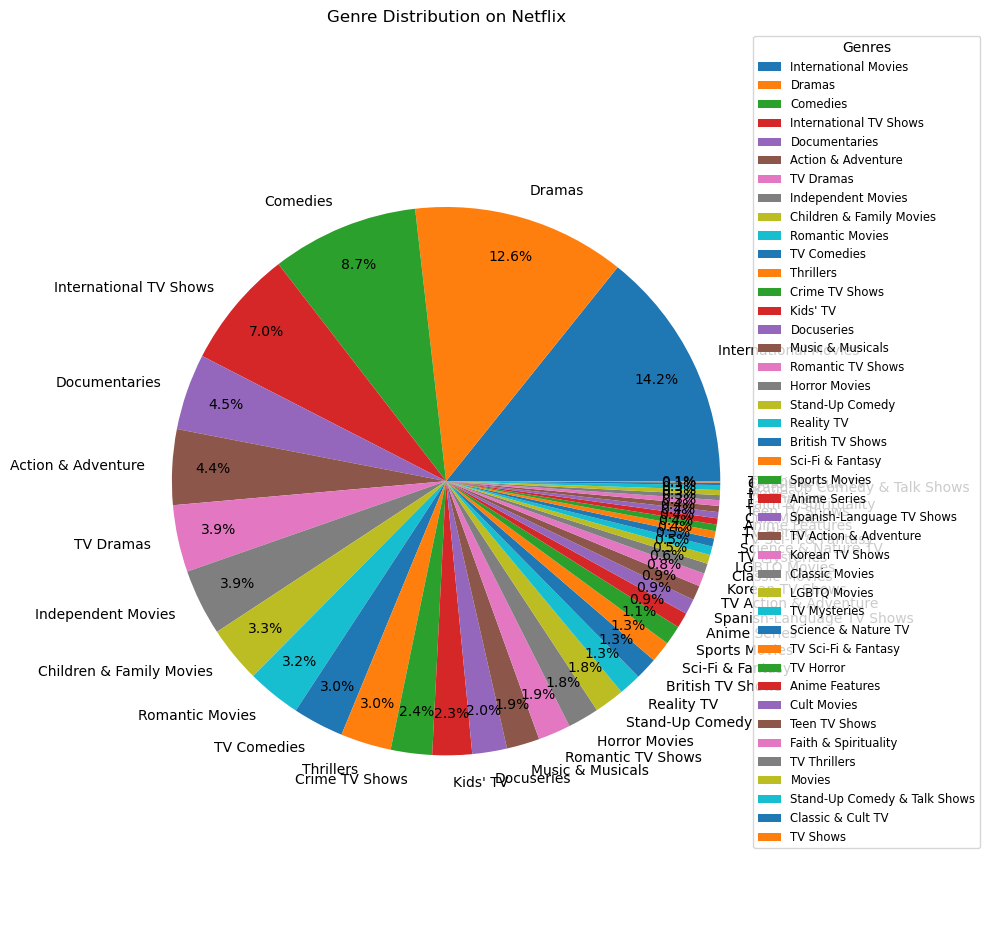

In [11]:
# What genres are most common in Netflix shows?

# Split and explode the genres
df_genres = df["listed_in"].str.split(',').explode().str.strip()
genre_counts = df_genres.value_counts()

# Set threshold and calculate "Other" count
threshold = 10
other_count = genre_counts[genre_counts < threshold].sum()
genre_counts = genre_counts[genre_counts >= threshold]

# Add "Other" if there are genres below the threshold
if other_count > 0:
    genre_counts['Other'] = other_count

# Update sizes and labels after adding "Other"
sizes = genre_counts.values  
labels = genre_counts.index   

# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Genre Distribution on Netflix")
plt.axis('equal')  
plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title="Genres")
plt.tight_layout()
plt.show()


Correlation between show duration and rating: nan


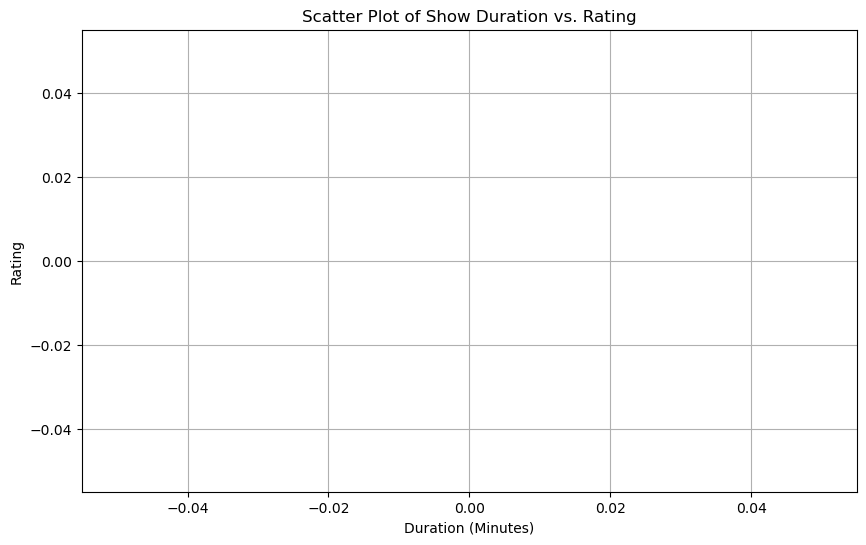

In [12]:
# Is there a correlation between show duration and rating?


df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)


df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')


df_cleaned = df.dropna(subset=['duration_minutes', 'rating_numeric'])


correlation = df_cleaned['duration_minutes'].corr(df_cleaned['rating_numeric'])
print(f"Correlation between show duration and rating: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['duration_minutes'], df_cleaned['rating_numeric'], alpha=0.5)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Rating")
plt.title("Scatter Plot of Show Duration vs. Rating")
plt.grid()
plt.show()


                num_shows    66 min    74 min    84 min         G     NC-17  \
United States        2818  0.000355  0.000355  0.000355  0.010291  0.000355   
India                 972  0.000000  0.000000  0.000000  0.000000  0.000000   
United Kingdom        419  0.000000  0.000000  0.000000  0.000000  0.000000   
Japan                 245  0.000000  0.000000  0.000000  0.000000  0.000000   
South Korea           199  0.000000  0.000000  0.000000  0.000000  0.000000   

                      NR        PG     PG-13         R     TV-14      TV-G  \
United States   0.012420  0.058197  0.102555  0.156139  0.144074  0.029099   
India           0.004115  0.002058  0.004115  0.001029  0.565844  0.009259   
United Kingdom  0.011933  0.004773  0.019093  0.078759  0.171838  0.054893   
Japan           0.000000  0.016393  0.012295  0.000000  0.372951  0.004098   
South Korea     0.015075  0.000000  0.000000  0.000000  0.417085  0.005025   

                   TV-MA     TV-PG      TV-Y     TV-Y7  

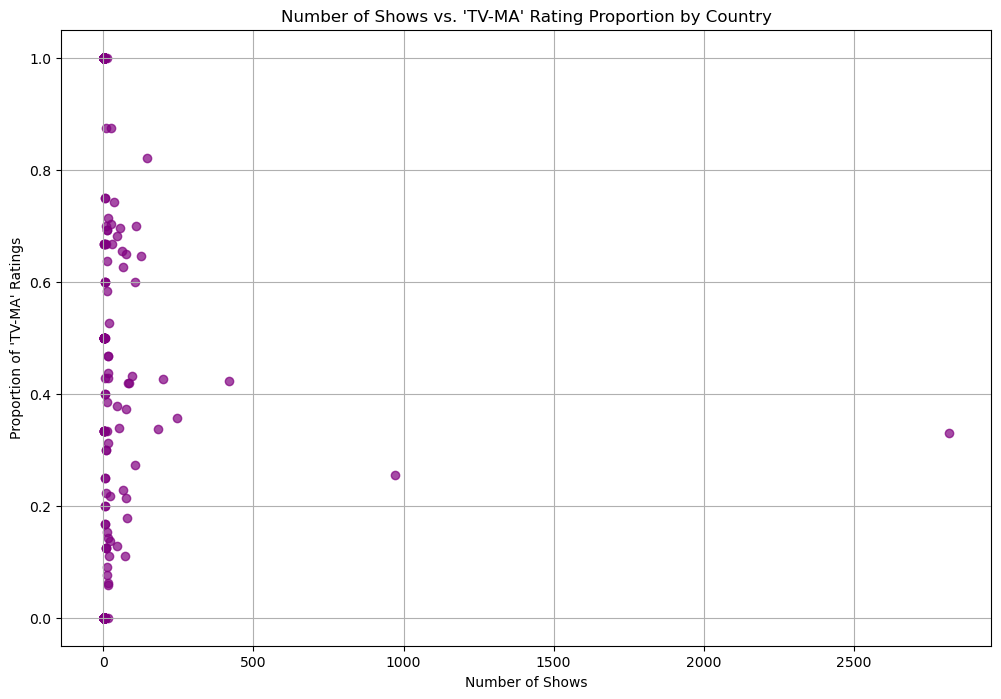

In [13]:
# How does the number of shows in a country relate to their average rating?

country_show_counts = df['country'].value_counts()


country_ratings = df.groupby('country')['rating'].value_counts(normalize=True).unstack().fillna(0)


country_data = pd.DataFrame(country_show_counts).rename(columns={'country': 'num_shows'})
country_data = country_data.join(country_ratings)


print(country_data.head())

plt.figure(figsize=(12, 8))
plt.scatter(country_data['num_shows'], country_data['TV-MA'], alpha=0.7, color='purple')
plt.title("Number of Shows vs. 'TV-MA' Rating Proportion by Country")
plt.xlabel("Number of Shows")
plt.ylabel("Proportion of 'TV-MA' Ratings")
plt.grid(True)
plt.show()


In [17]:
#What are the most common content ratings on Netflix (e.g., TV-MA, PG-13)? 
rating_counts = df['rating'].value_counts(0)
print("Most Common Content Ratings on Netflix:")
print(rating_counts)


Most Common Content Ratings on Netflix:
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


Likelihood of Multiple Seasons by Genre, Rating, and Country:
                  genre rating                            country  is_long
999           TV Dramas  TV-MA      Italy, United Kingdom, France      1.0
209          Docuseries  TV-MA              Canada, United States      1.0
496            Kids' TV   TV-Y  United States, South Korea, China      1.0
1101       TV Mysteries  TV-14              United States, Canada      1.0
1102       TV Mysteries  TV-14      United States, United Kingdom      1.0
...                 ...    ...                                ...      ...
559          Reality TV  TV-14                             France      0.0
560          Reality TV  TV-14                            Germany      0.0
564          Reality TV  TV-14                      Taiwan, China      0.0
567          Reality TV  TV-14               United States, India      0.0
608   Romantic TV Shows  TV-14                              Egypt      0.0

[1216 rows x 4 columns]


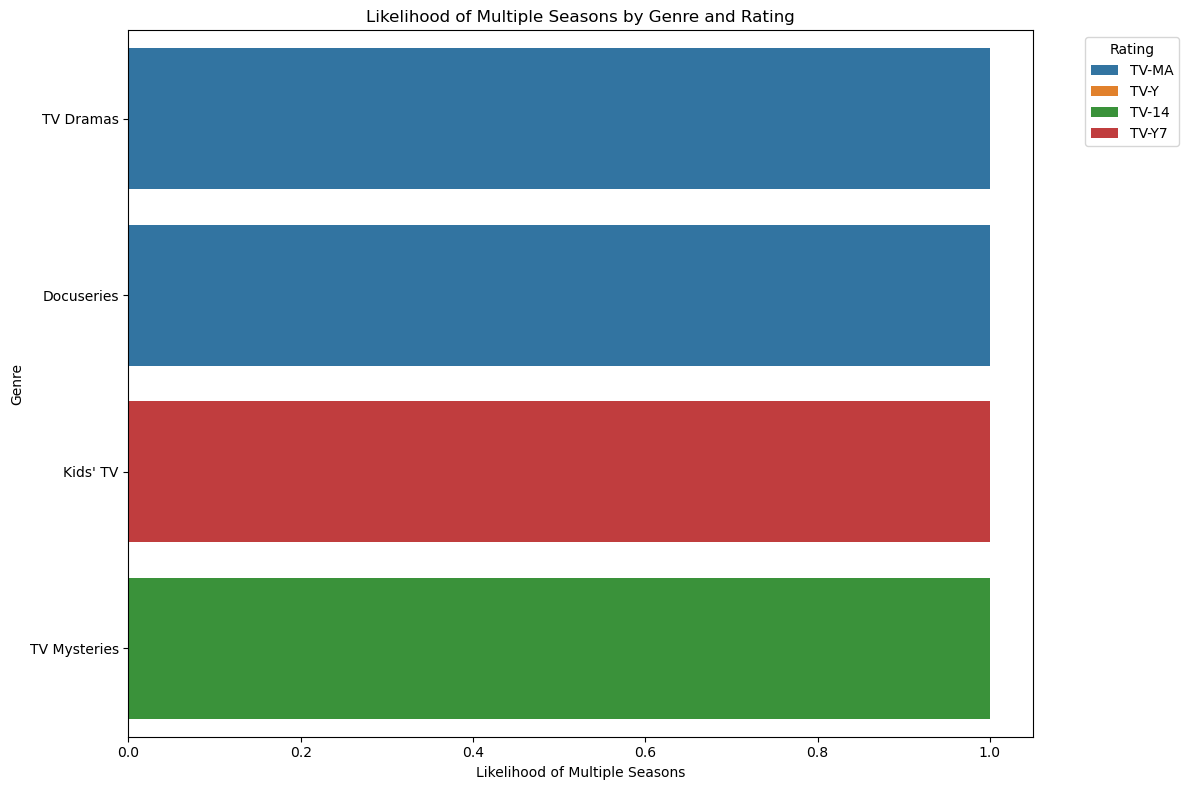

In [19]:
#What types of shows (e.g., by genre, rating, country) are more likely to have sequels or multiple seasons?

tv_shows = df[df['type'] == 'TV Show']


tv_shows = tv_shows.assign(genre=tv_shows['listed_in'].str.split(',')).explode('genre')
tv_shows['genre'] = tv_shows['genre'].str.strip()  # Remove any extra whitespace


tv_shows['is_long'] = tv_shows['duration'].str.extract('(\d+)').astype(float) > 1  # assuming duration is in seasons

sequel_likelihood = tv_shows.groupby(['genre', 'rating', 'country'])['is_long'].mean().reset_index()

sequel_likelihood = sequel_likelihood.sort_values(by='is_long', ascending=False)

print("Likelihood of Multiple Seasons by Genre, Rating, and Country:")
print(sequel_likelihood)



# Plot sequel likelihood by genre and rating (top 10 for simplicity)
plt.figure(figsize=(12, 8))
sns.barplot(data=sequel_likelihood.head(10), x='is_long', y='genre', hue='rating', dodge=False)
plt.title("Likelihood of Multiple Seasons by Genre and Rating")
plt.xlabel("Likelihood of Multiple Seasons")
plt.ylabel("Genre")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
#What is the average duration of movies versus TV shows across genres?

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']


movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Step 3: Separate genres by exploding the 'listed_in' column
movies = movies.assign(genre=movies['listed_in'].str.split(',')).explode('genre')
tv_shows = tv_shows.assign(genre=tv_shows['listed_in'].str.split(',')).explode('genre')

# Strip whitespace from genre names
movies['genre'] = movies['genre'].str.strip()
tv_shows['genre'] = tv_shows['genre'].str.strip()

# Step 4: Calculate the average duration by genre for movies and TV shows
avg_duration_movies = movies.groupby('genre')['duration_min'].mean().reset_index()
avg_duration_tv_shows = tv_shows.groupby('genre')['duration_seasons'].mean().reset_index()

# Rename columns for clarity
avg_duration_movies.columns = ['Genre', 'Average Duration (min)']
avg_duration_tv_shows.columns = ['Genre', 'Average Duration (seasons)']

# Display results
print("Average Duration of Movies by Genre (in minutes):")
print(avg_duration_movies)

print("\nAverage Duration of TV Shows by Genre (in seasons):")
print(avg_duration_tv_shows)



C:\Users\lenovo\AppData\Local\Temp\ipykernel_10324\3448570713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10324\3448570713.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


Average Duration of Movies by Genre (in minutes):
                       Genre  Average Duration (min)
0         Action & Adventure              113.515716
1             Anime Features               92.943662
2   Children & Family Movies               79.936037
3             Classic Movies              118.646552
4                   Comedies              103.876344
5                Cult Movies              104.521127
6              Documentaries               81.630610
7                     Dramas              113.051092
8       Faith & Spirituality              105.584615
9              Horror Movies               98.445378
10        Independent Movies              101.051587
11      International Movies              110.349927
12              LGBTQ Movies               94.294118
13                    Movies               45.481481
14          Music & Musicals              106.125333
15           Romantic Movies              110.573052
16          Sci-Fi & Fantasy              106.016